#### 2.1

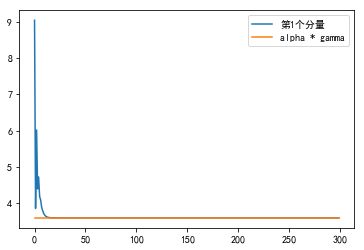

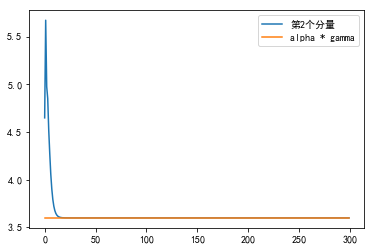

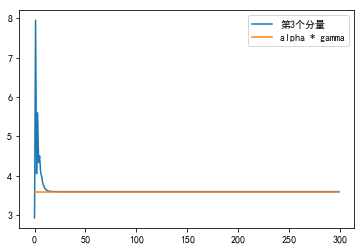

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

G = np.array([[1, 0.2, 0.1], [0.1, 2, 0.1], [0.3, 0.1, 3]])
gamma = 3
alpha = 1.2
sigma = 0.01
p = np.random.rand(3).reshape(-1, 1)
N = 300

def f(G, gamma, alpha, sigma, p, N):
    #数据维度
    n = G.shape[0]
    
    Lambda = np.diag(G).reshape(-1, 1)
    Res = np.array([])
    for i in range(N):
        s = Lambda * p
        q = sigma + G.dot(p) - Lambda * p
        S = s / q
        if i == 0:
            Res = np.copy(S)
        else:
            Res = np.c_[Res, S]
        #更新
        p = alpha * gamma * ((G / Lambda).dot(p) - p) + \
            alpha * gamma * sigma / Lambda
    
    target = np.ones(N) * alpha * gamma
    for i in range(n):
        si = Res[i, :]
        label = "第" + str(i+1) + "个分量"
        plt.plot(si, label=label)
        plt.plot(target, label="alpha * gamma")
        plt.legend()
        plt.show()

f(G, gamma, alpha, sigma, p, N)